# Baseline Model #1

## Predict Sea Surface Temperature (WTMP) using SARIMA Model

# Reaadings / Tutorials:

* https://towardsdatascience.com/weather-forecasting-with-machine-learning-using-python-55e90c346647
* https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* https://www.youtube.com/watch?v=8yzVWoivCF4

In [1]:
import pandas as pd
import missingno as msno
import script_utils as mL

from pmdarima import auto_arima
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

NDBC = mL.NDBC_lib()

In [2]:
## Figure out which station in the GOM is the best to use:

stations = NDBC.stations_GOM
NaN_statistic = pd.DataFrame()

for stationID in NDBC.cleaned_stations_GOM:
   data = NDBC.get_buoy_data(stationID, "2022")
   if data is not None:
       num_values, num_NaN_percentage, NaN_by_feature = NDBC.print_NaN_statistic(data, "", silent=True)
       new_row = pd.DataFrame({
           "StationID": [stationID],
           "#NaN in %": [num_NaN_percentage]
       })
       NaN_statistic = pd.concat([NaN_statistic, new_row])

NaN_statistic

from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
from disc
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Error 404: Not Found
Failed to get file: HTTP Err

,StationID,#NaN in %
0,41117,45.18
0,41112,45.19
0,42001,75.10
0,42002,46.91
0,42012,49.57
...,...,...
0,VCAT2,100.00
0,VENF1,100.00
0,WIWF1,100.00
0,WPLF1,100.00


In [3]:
STATION_ID = "42036"    # 33.61% NaN values -> Best value for GOM and 2022
YEAR = "2022"   #Because I want it to be as up-to-date as possible to test if additional years improve the performance.

In [4]:
data = NDBC.get_buoy_data(STATION_ID, YEAR)
data

from disc


,WDIR_42036,WSPD_42036,WVHT_42036,APD_42036,MWD_42036,PRES_42036,ATMP_42036,WTMP_42036,DEWP_42036
timestamp,,,,,,,,,
2022-01-01 00:00:00,168.0,3.5,NaN,NaN,NaN,1016.3,23.3,23.0,23.3
2022-01-01 01:00:00,166.0,4.5,NaN,NaN,NaN,1016.6,23.2,23.0,23.2
2022-01-01 02:00:00,171.0,5.4,NaN,NaN,NaN,1017.0,23.2,23.0,23.2
2022-01-01 03:00:00,170.0,5.2,NaN,NaN,NaN,1017.1,23.2,23.0,23.2
2022-01-01 04:00:00,169.0,5.7,NaN,NaN,NaN,1017.1,23.2,23.0,23.2
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,147.0,7.9,NaN,NaN,NaN,1016.2,21.3,22.0,20.9
2022-12-31 20:00:00,164.0,6.1,NaN,NaN,NaN,1016.1,21.5,22.0,21.2
2022-12-31 21:00:00,187.0,4.9,NaN,NaN,NaN,1016.6,22.2,22.1,21.4


In [5]:
data = data.drop([
    "WDIR_42036",
    "WSPD_42036",
    "WVHT_42036",
    "APD_42036",
    "MWD_42036",
    "PRES_42036",
    "ATMP_42036",
    #"WTMP_42036",
    "DEWP_42036"], axis=1)

data

,WTMP_42036
timestamp,
2022-01-01 00:00:00,23.0
2022-01-01 01:00:00,23.0
2022-01-01 02:00:00,23.0
2022-01-01 03:00:00,23.0
2022-01-01 04:00:00,23.0
...,...
2022-12-31 19:00:00,22.0
2022-12-31 20:00:00,22.0
2022-12-31 21:00:00,22.1


In [6]:
print("NaN values: ", data.isna().sum().sum())
# msno.matrix(data)

NaN values:  57


In [7]:
data.fillna(method='ffill', inplace=True) #ffill .. forward fill (just copy previous value)
print("Remaining NaN values: ", data.isna().sum().sum())
# msno.matrix(data)

Remaining NaN values:  0


<AxesSubplot:xlabel='timestamp'>

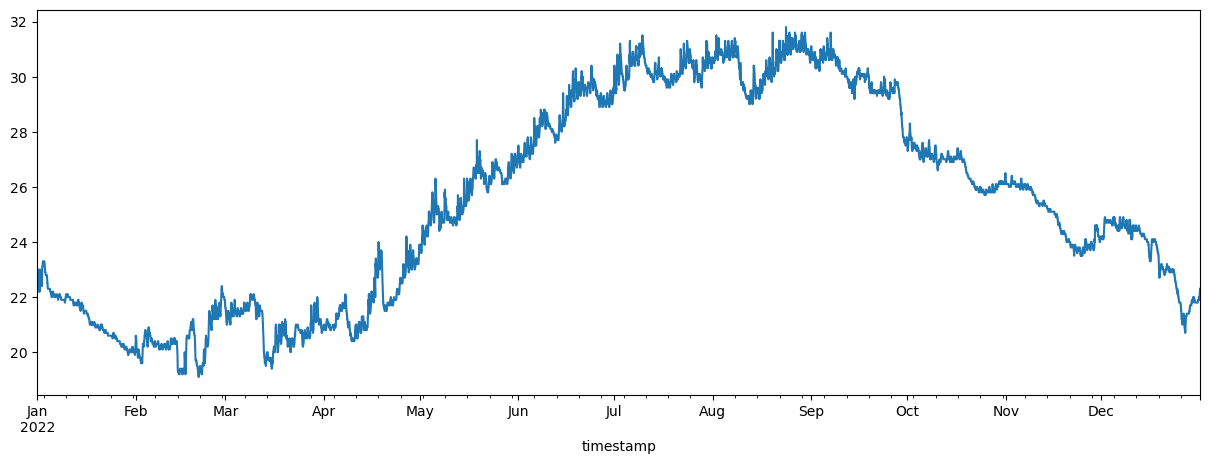

In [8]:
data["WTMP_42036"].plot(figsize=(15,5))

## Train / Test Split

In [9]:
test_hours = 7*24 #one week forecast

# split the dataframe into training and testing subsets
train = data.iloc[: -test_hours,:]
test = data.iloc[-test_hours:, :]

In [10]:
train

,WTMP_42036
timestamp,
2022-01-01 00:00:00,23.0
2022-01-01 01:00:00,23.0
2022-01-01 02:00:00,23.0
2022-01-01 03:00:00,23.0
2022-01-01 04:00:00,23.0
...,...
2022-12-24 19:00:00,22.2
2022-12-24 20:00:00,22.3
2022-12-24 21:00:00,22.2


In [11]:
test

,WTMP_42036
timestamp,
2022-12-25 00:00:00,22.2
2022-12-25 01:00:00,22.2
2022-12-25 02:00:00,22.1
2022-12-25 03:00:00,22.1
2022-12-25 04:00:00,22.0
...,...
2022-12-31 19:00:00,22.0
2022-12-31 20:00:00,22.0
2022-12-31 21:00:00,22.1


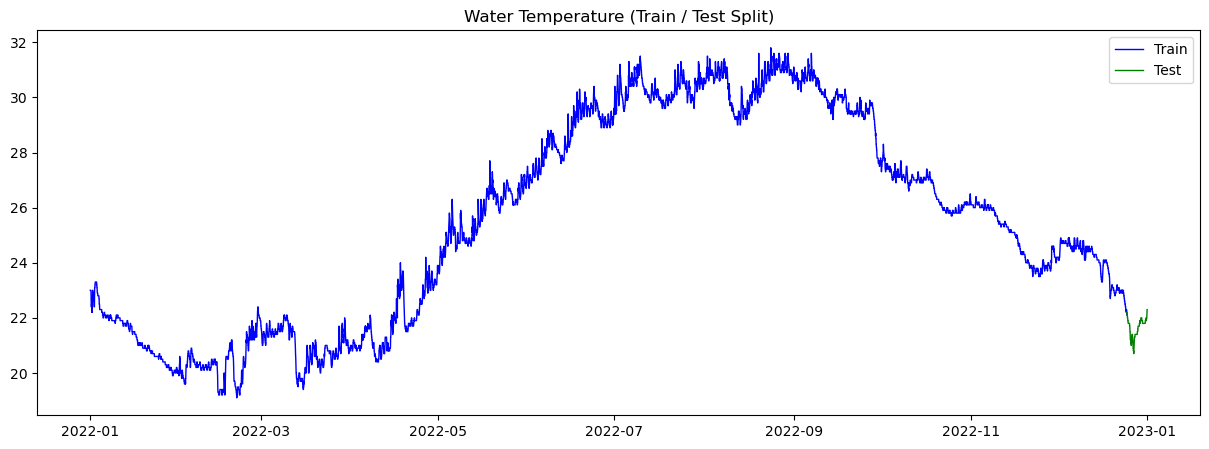

In [12]:
# create a figure and axes objects with figsize
fig, ax = plt.subplots(figsize=(15, 5))

# plot the train and test data
ax.plot(train.index, train['WTMP_42036'], color='blue', label='Train', lw=1)
ax.plot(test.index, test['WTMP_42036'], color='green', label='Test', lw = 1)

# add heading and legend to the chart
ax.set_title('Water Temperature (Train / Test Split)')
ax.legend()

# display the chart
plt.show()

In [13]:
model = auto_arima(y=train.WTMP_42036,
                   m= 24    #Seasonal component (daily)
                   )

In [14]:
predictions = pd.Series(model.predict(n_periods = len(test)))
predictions.index = test.index
predictions

timestamp
2022-12-25 00:00:00    22.100000
2022-12-25 01:00:00    22.089727
2022-12-25 02:00:00    22.089727
2022-12-25 03:00:00    22.089727
2022-12-25 04:00:00    22.079454
                         ...    
2022-12-31 19:00:00    21.894709
2022-12-31 20:00:00    21.894764
2022-12-31 21:00:00    21.894709
2022-12-31 22:00:00    21.894691
2022-12-31 23:00:00    21.894636
Length: 168, dtype: float64

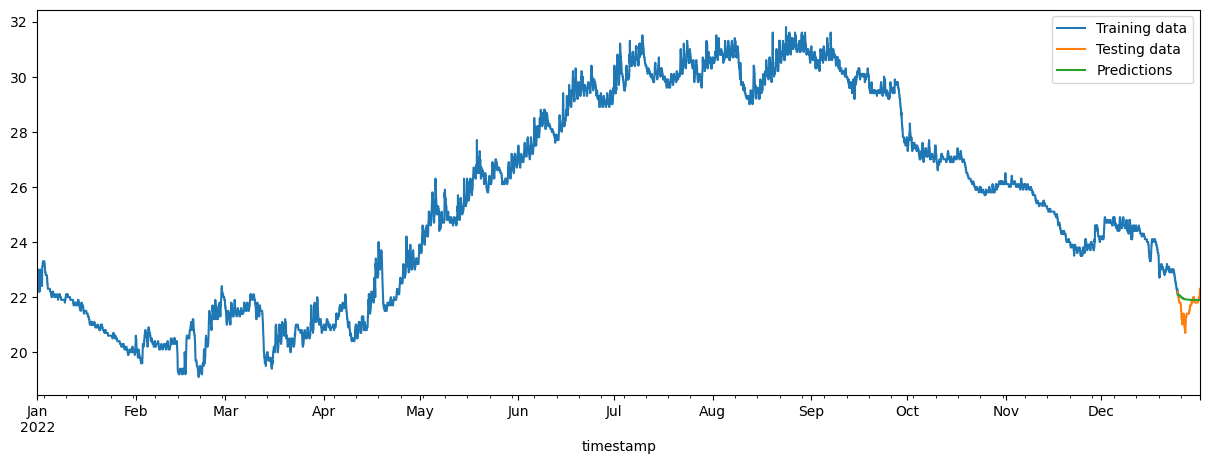

In [15]:
train['WTMP_42036'].plot(figsize = (15,5), label = 'Training data')
test['WTMP_42036'].plot(label = 'Testing data')
predictions.plot(label = 'Predictions')
plt.legend()

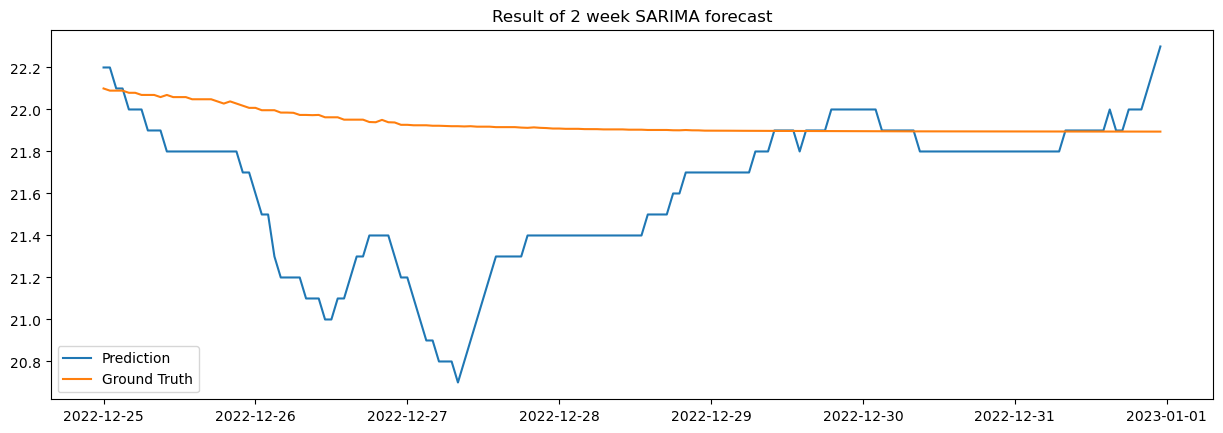

In [16]:
#test['WTMP_42036'].plot(label = 'Ground True')
#predictions.plot(label = 'Predictions')
#plt.legend()


plt.figure().set_figwidth(15)
plt.plot(test['WTMP_42036'], label="Prediction")
plt.plot(predictions, label="Ground Truth")
plt.title("Result of 2 week SARIMA forecast")
plt.legend()
plt.show()


In [17]:
test["WTMP_42036_prediction"] = predictions
test

/var/folders/ys/lj6w647n5qjdv23zdxs_fn740000gn/T/ipykernel_5272/3717574519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["WTMP_42036_prediction"] = predictions


,WTMP_42036,WTMP_42036_prediction
timestamp,,
2022-12-25 00:00:00,22.2,22.100000
2022-12-25 01:00:00,22.2,22.089727
2022-12-25 02:00:00,22.1,22.089727
2022-12-25 03:00:00,22.1,22.089727
2022-12-25 04:00:00,22.0,22.079454
...,...,...
2022-12-31 19:00:00,22.0,21.894709
2022-12-31 20:00:00,22.0,21.894764
2022-12-31 21:00:00,22.1,21.894709


In [18]:
mae = mean_absolute_error(test["WTMP_42036"], test["WTMP_42036_prediction"])
mse = mean_squared_error(test["WTMP_42036"], test["WTMP_42036_prediction"])

print("Mean Absolute Error: ", mae)
print("Mean Squared Error: ", mse)

Mean Absolute Error:  0.34106243459144897
Mean Squared Error:  0.21585821241299014


In [19]:
result_12h = test.head(12)
result_12h

,WTMP_42036,WTMP_42036_prediction
timestamp,,
2022-12-25 00:00:00,22.2,22.100000
2022-12-25 01:00:00,22.2,22.089727
2022-12-25 02:00:00,22.1,22.089727
2022-12-25 03:00:00,22.1,22.089727
2022-12-25 04:00:00,22.0,22.079454
2022-12-25 05:00:00,22.0,22.079454
2022-12-25 06:00:00,22.0,22.069269
2022-12-25 07:00:00,21.9,22.069181
2022-12-25 08:00:00,21.9,22.069181


In [20]:
mae = mean_absolute_error(result_12h["WTMP_42036"], result_12h["WTMP_42036_prediction"])
mse = mean_squared_error(result_12h["WTMP_42036"], result_12h["WTMP_42036_prediction"])
print("ACCURACY FOR 12 HOUR FORECAST:")
print('MAE: ', mae)
print('MSE: ', mse)

ACCURACY FOR 12 HOUR FORECAST:
MAE:  0.12370341246385112
MSE:  0.02181751874002957


# Baseline Model 1:

Dataset:
Only one buoy: 42036
Time: one year (2022)
Features: Only consider single feature (in that case WTMP)

Preprocessing:
* (Merge time related columns to one timestamp)
* Replace 9999 etc. with NaN
* Filter by 1h timestamps (not sure if this changed anything ... ) + added raw if no value available!
* NaN imputation: forward fill ... it basically uses the previous value and copies it.

Train / Test Split: predict last week of this year.

Result:
See chart above
MAE: 0.34°C
MSE: 2%

